In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
from matplotlib import rcParams

# Set global font properties to Arial
rcParams.update(
    {
        "font.family": "sans-serif",
        "font.sans-serif": "Arial",
        "pdf.fonttype": 42,  # Embed fonts as Type 3 fonts for compatibility
        "ps.fonttype": 42,
        "text.usetex": False,
        "svg.fonttype": "none",
    }
)

rcParams.update(
    {
        "font.size": 24,  # Set a default font size
        "legend.fontsize": 16,
        "legend.handlelength": 2,
        "axes.linewidth": 2,
    }
)

plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.labelsize"] = 20


In [3]:
d1 = "#BF1D2D"
d2 = "#262626"
d3 = "#293890"

e1 = "#2F2D54"
e2 = "#9193B4"
e3 = "#BD9AAD"
e4 = "#E8D2B3"

f1 = "#377eb8"
f2 = "#4daf4a"

g1 = "#b7bec8ff"
g2 = "#ff8080ff"
g3 = "#ff9999ff"
g4 = "#ffb3b3ff"

# SV Evaluation


In [ ]:
# CNN for mk1c
# Data for stacked bar chart (TP/FP composition)
# Format: Set_Name, TP, FP, Total
# Set_A   7193    444197  451390
# Set_B   6586    293841  300427
# Set_C   6542    159109  165651

# Data for TP retention & decomposition chart
# Set A TP
# A_TP    7193
# Set C TP and retention
# C_TP    6542
# Retention_percentage    0.9095
# Set B TP decomposition
# B_TP_total      6586
# B_intersect_D   5837
# Overkill        749


# Hyena for mk1c

# Data for stacked bar chart (TP/FP composition)
# Format: Set_Name, TP, FP, Total
# Set_A   7193    444197  451390
# Set_B   6818    420891  427709
# Set_C   6269    32163   38432

# Data for TP retention & decomposition chart
# Set A TP
# A_TP    7193
# Set C TP and retention
# C_TP    6269
# Retention_percentage    0.8715
# Set B TP decomposition
# B_TP_total      6818
# B_intersect_D   5828
# Overkill        990

# hyena for p2

# Data for stacked bar chart (TP/FP composition)
# Format: Set_Name, TP, FP, Total
# Set_A   8815    3601099 3609914
# Set_B   8416    3503114 3511530
# Set_C   8067    297503  305570

# Data for TP retention & decomposition chart
# Set A TP
# A_TP    8815
# Set C TP and retention
# C_TP    8067
# Retention_percentage    0.9151
# Set B TP decomposition
# B_TP_total      8416
# B_intersect_D   7337
# Overkill        1079


In [55]:
def draw_stacked_bar_chart(data, group_name, file_name=None, group1_color=g2, group2_color=g1, reduction_percentage_y_shift=10000):
    # Extracting data for plotting
    sets = list(data.keys())

    group1_name = group_name[0]
    group2_name = group_name[1]

    bulk_values = [data[set_name][group1_name] for set_name in sets]
    no_support_values = [data[set_name][group2_name] for set_name in sets]

    # Define colors for Bulk and No support
    bulk_color = group1_color  
    no_support_color = group2_color 

    # Plotting the stacked bar chart
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(sets, bulk_values, label=group1_name, color=bulk_color)
    ax.bar(
        sets,
        no_support_values,
        bottom=bulk_values,
        label=group2_name,
        color=no_support_color,
    )

    # Adding total number on the top of each bar
    for i, set_name in enumerate(sets):
        total_value = bulk_values[i] + no_support_values[i]
        ax.text(i, total_value + 5000, f"{total_value}", ha='center', va='bottom', fontsize=10)

        # Calculate and display the total number reduction percentage for ChimeraLM compared to MDA
        if set_name == "ChimeraLM Dataset":
            mda_total = bulk_values[sets.index("MDA Dataset")] + no_support_values[sets.index("MDA Dataset")]
            reduction_percentage = ((mda_total - total_value) / mda_total) * 100
            ax.text(i, total_value + reduction_percentage_y_shift, f"Reduction: {reduction_percentage:.2f}%", ha='center', va='bottom', fontsize=10, color='red')

    # Adding labels and title
    ax.set_ylabel("Count (1000 X)", fontsize=16)

    # Adjust y-tick labels to be in thousands
    y_ticks = ax.get_yticks()
    ax.set_yticklabels([f"{int(tick/1000)}" for tick in y_ticks])

    ax.legend()

    # Improve layout
    sns.despine(offset=10, trim=True)
    plt.tight_layout()

    if file_name is not None:
        plt.savefig(file_name, dpi=300)

def draw_support_bar_chart(data, group_name, file_name=None, group1_color=g2, group2_color=g1):
    # Extracting data for plotting
    sets = list(data.keys())

    group1_name = group_name[0]
    group2_name = group_name[1]

    supported_values = [data[set_name][group1_name] for set_name in sets]

    # Define colors for supported
    supported_color = group1_color

    # Plot bar chart for only supported
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(sets, supported_values, label=group1_name, color=supported_color)

    # Calculate and display the percentage of ChimeraLM support relative to MDA support
    mda_support = data["MDA Dataset"][group1_name]
    chimera_support = data["ChimeraLM Dataset"][group1_name]
    percentage_support = (chimera_support / mda_support) * 100

    # Adding percentage text on the plot
    ax.text(1, chimera_support + 500, f"Retention: {percentage_support:.2f}%", ha='center', va='bottom', fontsize=10, color='red')

    ax.set_ylabel("Count", fontsize=16)

    sns.despine(offset=10, trim=True)
    plt.tight_layout()

    if file_name is not None:
        plt.savefig(file_name, dpi=300)

In [ ]:
cnn_mk1c_data = {
    "MDA Dataset": {"Supported": 7193, "Unsupported": 444197},
    "ChimeraLM Dataset": {"Supported": 6542, "Unsupported": 159109},
}

hyena_mk1c_data = {
    "MDA Dataset": {"Supported": 7193, "Unsupported": 444197},
    "ChimeraLM Dataset": {"Supported": 6269, "Unsupported": 32163},
}

hyena_p2_data = {
    "MDA Dataset": {"Supported": 8815, "Unsupported": 3601099},
    "ChimeraLM Dataset": {"Supported": 8067, "Unsupported": 297503},
}


/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_18045/416344207.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(tick/1000)}" for tick in y_ticks])


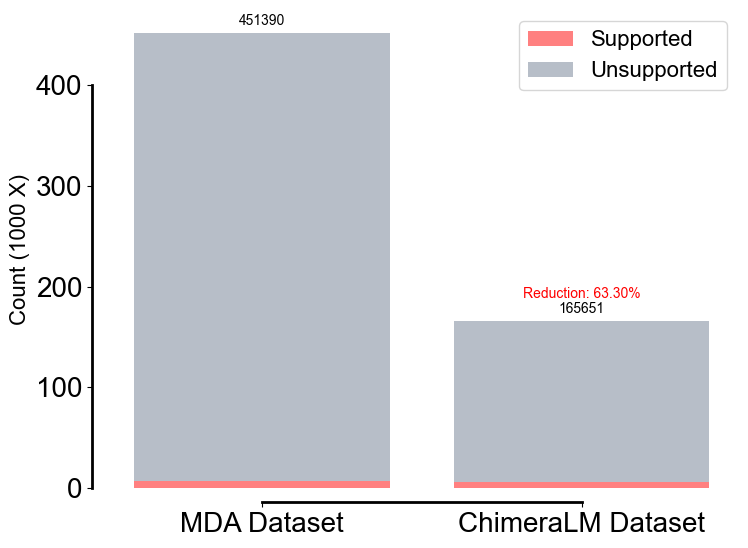

In [ ]:
# Data for stacked bar chart (Bulk/No support composition)
draw_stacked_bar_chart(cnn_mk1c_data, ["Supported", "Unsupported"], "cnn_mk1c.png")

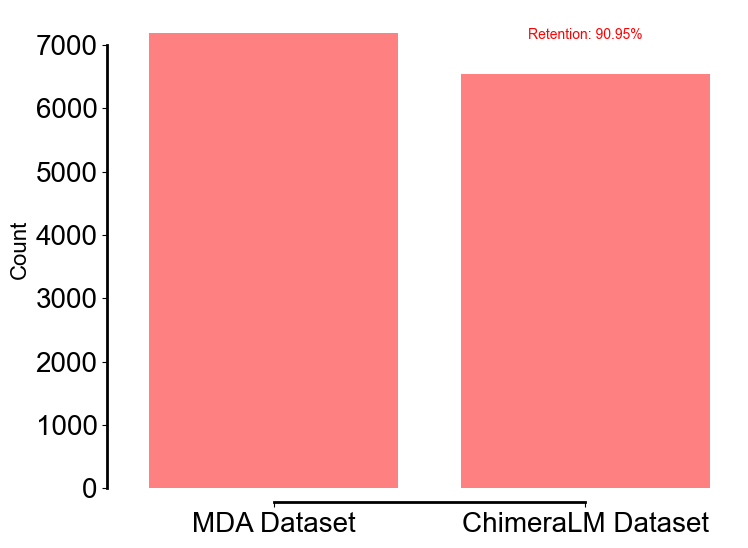

In [50]:
draw_support_bar_chart(cnn_mk1c_data, ["Supported", "Unsupported"], "cnn_mk1c_support.png")

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_18045/416344207.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(tick/1000)}" for tick in y_ticks])


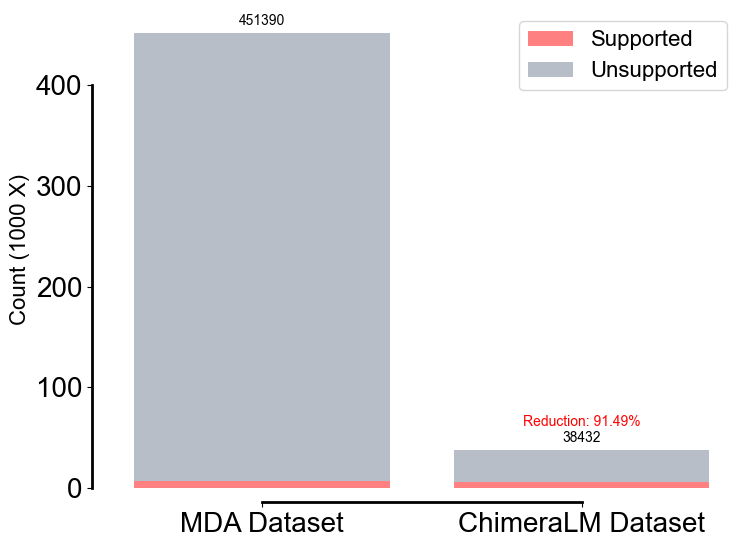

In [52]:
draw_stacked_bar_chart(hyena_mk1c_data, ["Supported", "Unsupported"], "hyena_mk1c.png")

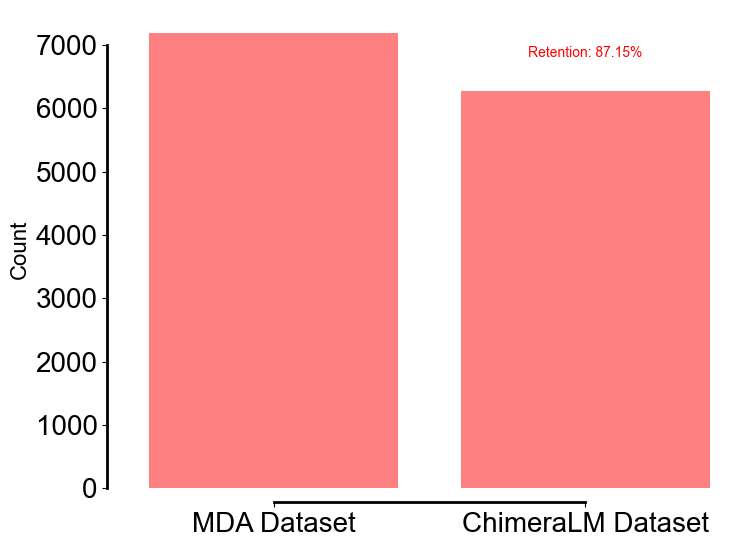

In [53]:
draw_support_bar_chart(hyena_mk1c_data, ["Supported", "Unsupported"], "hyena_mk1c_support.png")

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_18045/1407858057.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(tick/1000)}" for tick in y_ticks])


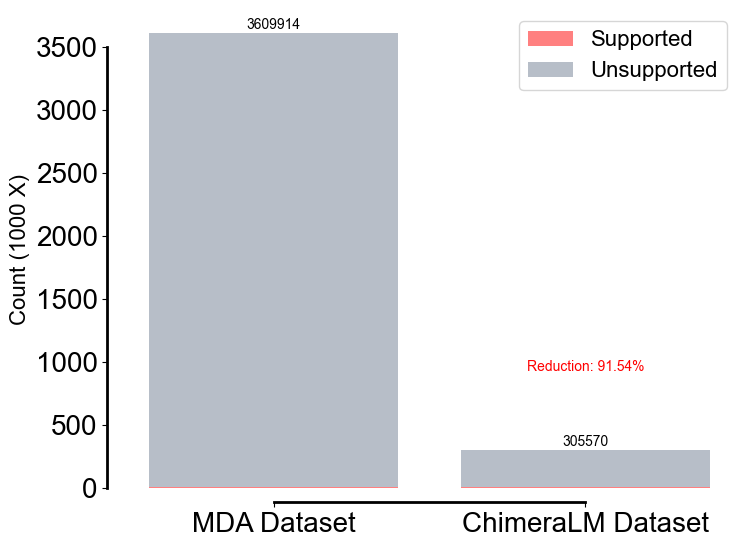

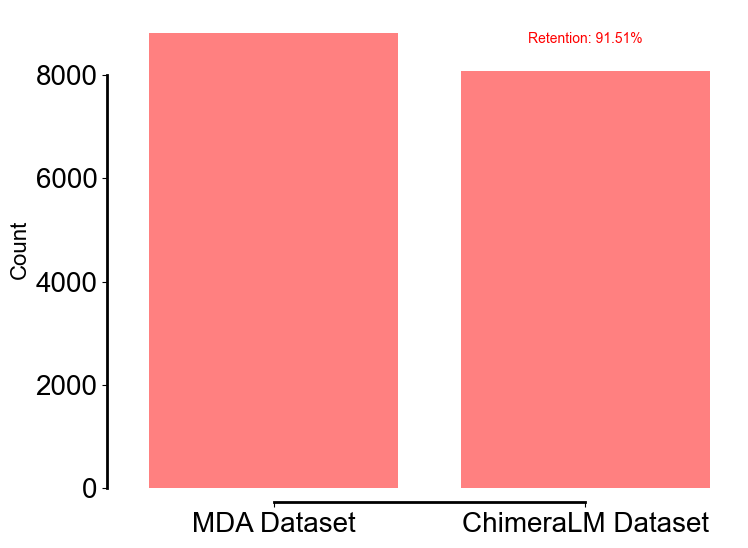

In [63]:

draw_stacked_bar_chart(hyena_p2_data, ["Supported", "Unsupported"], "hyena_p2.png", reduction_percentage_y_shift=600000)
draw_support_bar_chart(hyena_p2_data, ["Supported", "Unsupported"], "hyena_p2_support.png")

# Chimeric Reads




| Sample | No. chimeric reads  | No. total reads | ratio |
|---|---|---|---|
| P2 MDA | 12963576 | 28027667  | 0.46 |  
| P2 Bulk |  233740  | 10065403  | 0.023  | 
| mk1c MDA | 1666427 |7193945  | 0.23 | 
| mk1c Bulk | 28748 |1140363  | 0.025  | 




| Sample | No. chimeric reads  | No. total reads | ratio |
|---|---|---|---|
| P2 MDA | 12963576 | 28027667  | 0.46 |  
| P2 Bulk |  233740  | 10065403  | 0.023  | 
| P2 ChimeraLM |  769743  | 15833834  | 0.0486  | 
| mk1c MDA | 1666427 |7193945  | 0.23 | 
| mk1c Bulk | 28748 |1140363  | 0.025  |
| mk1c ChimeraLM | 82734 |5610252  | 0.0147  |



mk1c prediction: {1: 1583693, 0: 82734}
p2 prediction: {1: 12193833, 0: 769743}

<Figure size 1500x600 with 0 Axes>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

Text(0, 0.5, 'No. of Reads')

Text(0, 29429050.35, 'Percentage: 46.0%')

Text(1, 10568673.15, 'Percentage: 2.3%')

Text(2, 16625525.7, 'Percentage: 4.9%')

Text(3, 7553642.25, 'Percentage: 23.0%')

Text(4, 1197381.15, 'Percentage: 2.5%')

Text(5, 5890764.6, 'Percentage: 1.5%')

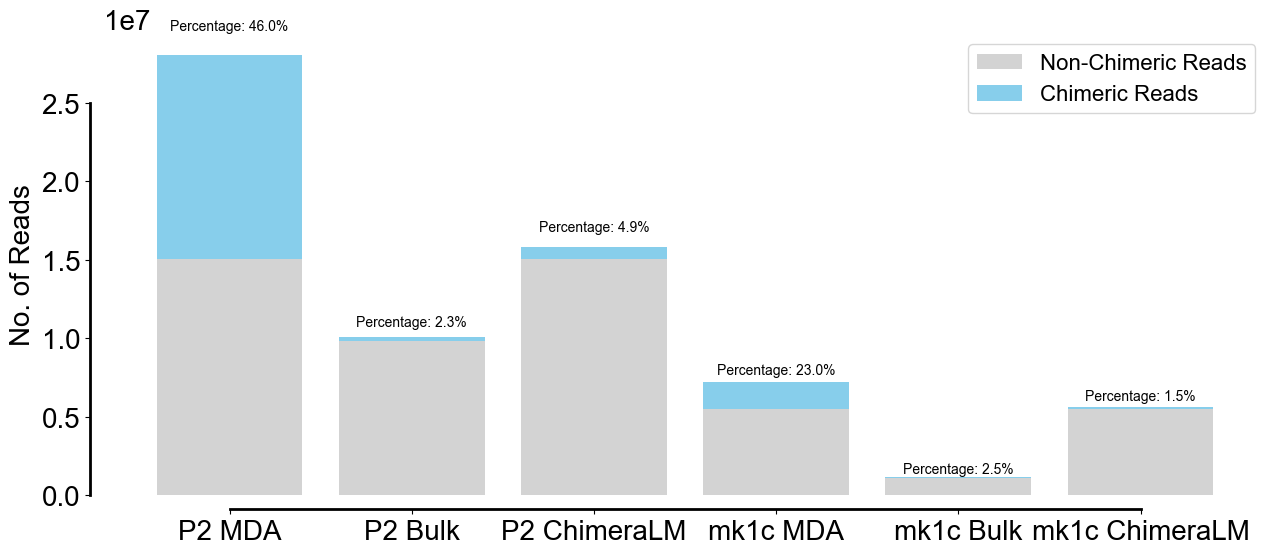

In [98]:
# Define the new data
samples_new = ["P2 MDA", "P2 Bulk", "P2 ChimeraLM", "mk1c MDA", "mk1c Bulk", "mk1c ChimeraLM"]
chimeric_reads_new = [12963576, 233740, 769743, 1666427, 28748, 82734]
total_reads_new = [28027667, 10065403, 15833834, 7193945, 1140363, 5610252]
ratios_new = [0.46, 0.023, 0.0486, 0.23, 0.025, 0.0147]

# Create a stacked bar chart for the new data
plt.figure(figsize=(15, 6))
ax_new = plt.gca()

# Plot the non-chimeric reads at the bottom
non_chimeric_reads_new = [
    total - chimeric for total, chimeric in zip(total_reads_new, chimeric_reads_new)
]
ax_new.bar(
    samples_new,
    non_chimeric_reads_new,
    label="Non-Chimeric Reads",
    color="lightgrey",
)

# Plot the chimeric reads on top
ax_new.bar(samples_new, chimeric_reads_new, bottom=non_chimeric_reads_new, label="Chimeric Reads", color="skyblue")

# Add labels and title
plt.ylabel("No. of Reads")
ax_new.legend()

# Annotate the bars with the chimeric ratio
for i, ratio in enumerate(ratios_new):
    percentage = ratio * 100
    ax_new.text(
        i,
        total_reads_new[i] + 0.05 * total_reads_new[i],
        f"Percentage: {percentage:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10,
    )

sns.despine(offset=10, trim=True)

plt.savefig("chimeric_reads_stacked_bar_chart_with_chimera_lm.png", dpi=300)

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0, 0.5, 'No. of Reads')

Text(0, 29429050.35, 'Percentage: 46.0%')

Text(1, 10568673.15, 'Percentage: 2.3%')

Text(2, 7553642.25, 'Percentage: 23.0%')

Text(3, 1197381.15, 'Percentage: 2.5%')

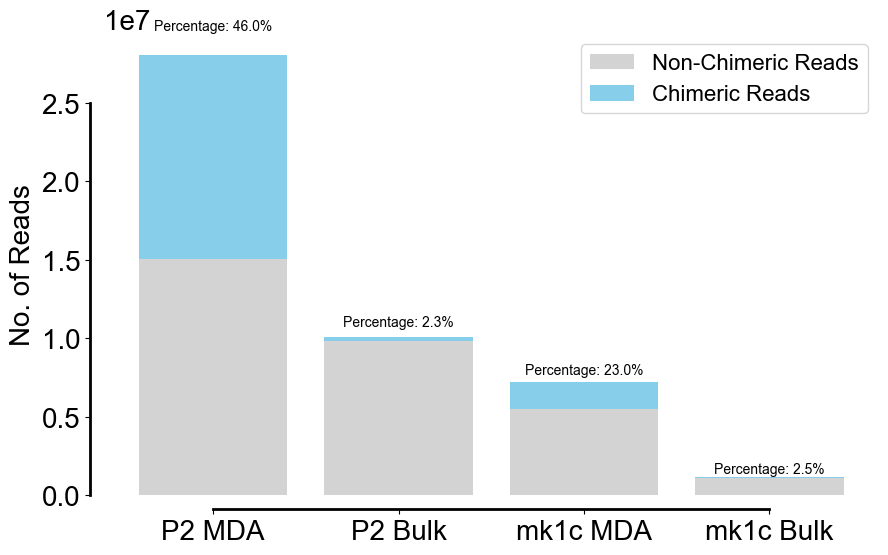

In [99]:
samples = ["P2 MDA", "P2 Bulk", "mk1c MDA", "mk1c Bulk"]
chimeric_reads = [12963576, 233740, 1666427, 28748]
total_reads = [28027667, 10065403, 7193945, 1140363]
ratios = [0.46, 0.023, 0.23, 0.025]

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the non-chimeric reads at the bottom
non_chimeric_reads = [
    total - chimeric for total, chimeric in zip(total_reads, chimeric_reads)
]
ax.bar(
    samples,
    non_chimeric_reads,
    label="Non-Chimeric Reads",
    color="lightgrey",
)

# Plot the chimeric reads on top
ax.bar(samples, chimeric_reads, bottom=non_chimeric_reads, label="Chimeric Reads", color="skyblue")

# Add labels and title
plt.ylabel("No. of Reads")
ax.legend()

# Annotate the bars with the chimeric ratio
for i, ratio in enumerate(ratios):
    percentage = ratio * 100
    ax.text(
        i,
        total_reads[i] + 0.05 * total_reads[i],
        f"Percentage: {percentage:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10,
    )

sns.despine(offset=10, trim=True)
plt.savefig("chimeric_reads_stacked_bar_chart.png", dpi=300)

<Figure size 800x600 with 0 Axes>

Text(0, 0.5, 'No. chimeric reads')

[Text(0, 0, '12670396.00'),
 Text(0, 0, '190309.00'),
 Text(0, 0, '101094.00'),
 Text(0, 0, '1777.00')]

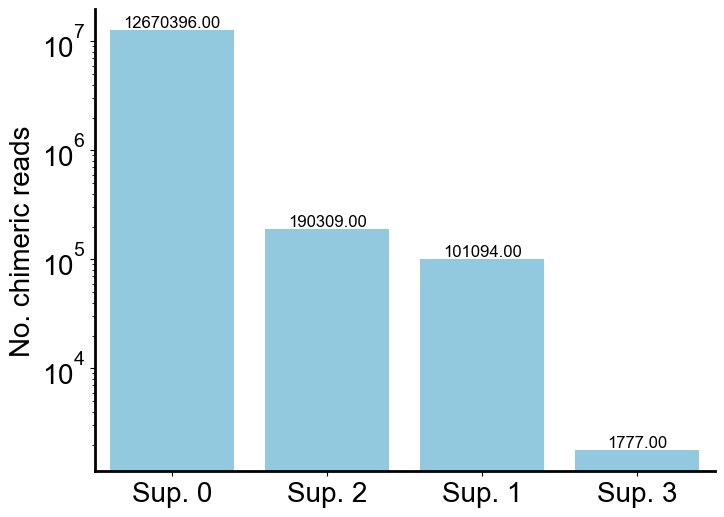

In [77]:
# Data for the bar chart
samples = ["Sup. 0", "Sup. 2", "Sup. 1", "Sup. 3"]
values = [12670396, 190309, 101094, 1777]

# Create a bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=samples, y=values, color='skyblue')

# Add labels and title
plt.ylabel('No. chimeric reads')
ax.bar_label(ax.containers[0], fmt="%.2f", fontsize=12)
plt.yscale("log")
sns.despine()

plt.savefig("p2_sup_by_bulk_chimeric_reads.png", dpi=300)

<Figure size 800x600 with 0 Axes>

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_18045/2154994852.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=metrics, y=values, palette='muted')


Text(0, 0.8545590519905091, '0.805')

Text(1, 0.7497780203819275, '0.700')

Text(2, 0.9962446570396425, '0.946')

Text(0, 0.5, 'Values')

(0.0, 1.0)

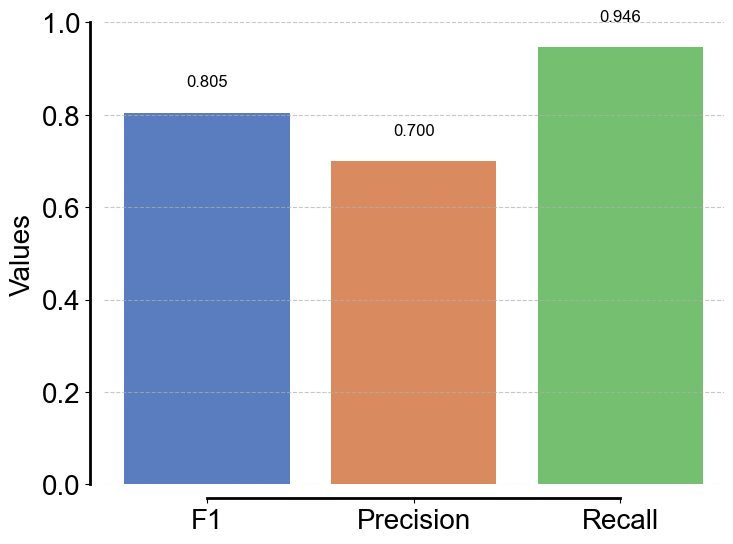

In [110]:
# Data for the bar plot
metrics = ["F1", "Precision", "Recall"]
values = [0.804559051990509, 0.6997780203819275, 0.9462446570396424]

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=metrics, y=values, palette='muted')

# Annotate the bars with the values
for i, value in enumerate(values):
    ax.text(i, value + 0.05, f"{value:.3f}", ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.ylabel('Values')
plt.ylim(0, 1)  # Set y-axis limits for better comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(offset=10, trim=True)

plt.savefig("performance_metrics_bar_plot.png", dpi=300)

# Read length and Number of chimeric alignments



In [45]:
import numpy as np

read_length_data = {
    "P2 MDA": "./data/prediction_and_chimeric/PC3_10_cells_MDA_P2_dirty.npz",
    "P2 Bulk": "./data/prediction_and_chimeric/PC3_bulk_WGS_P2_clean_read_lengths.npz",
    "mk1c MDA": "./data/prediction_and_chimeric/PC3_10_cells_MDA_Mk1c_dirty.chimeric.npz",
    "mk1c Bulk": "./data/prediction_and_chimeric/PC3_bulk_WGS_mk1c_clean_read_lengths.npz",
}

def load_npz_data(npz_file_path):
    results= {}
    for key, value in npz_file_path.items():
        data = np.load(value)
        results[key] = data["read_lengths"]
    return results

def plot_read_length_distribution_from_npz(read_length_data, figsize=(12, 8),  figure_name=None, max_y_value=None, plot_type="boxen"):
    """
    Plot the distribution of values from multiple numpy arrays stored in npz files.

    Parameters:
    read_length_data (dict): Dictionary where keys are dataset names and values are paths to the npz files.
    """
    plt.figure(figsize=figsize)
    # Create a box plot for all datasets
    if plot_type == "boxen":
        sns.boxenplot(data=read_length_data)
    elif plot_type == "box":
        sns.boxplot(data=read_length_data)
    elif plot_type == "kde":
        sns.kdeplot(data=read_length_data, fill=True)
    elif plot_type == "violin":
        sns.violinplot(data=read_length_data)

    plt.xlabel("Datasets")
    plt.ylabel("Read Length")

    # set max y value
    if max_y_value is not None:
        plt.ylim(0, max_y_value)

    sns.despine(offset=10, trim=True)

    if figure_name is not None:
        plt.savefig(figure_name, dpi=300)


In [36]:
read_length_array = load_npz_data(read_length_data)

In [ ]:
read_length_array

{'P2 MDA': array([ 584,  517,  646, ..., 1304, 6372,  739], shape=(12963576,)),
 'P2 Bulk': array([ 2111, 62071, 23792, ..., 46520,  2255,  1049], shape=(233740,)),
 'mk1c MDA': array([3895, 3139, 5973, ...,  854, 1228,  857], shape=(1666427,)),
 'mk1c Bulk': array([30988, 29496,  6327, ...,  8509, 72181, 14390], shape=(28748,))}

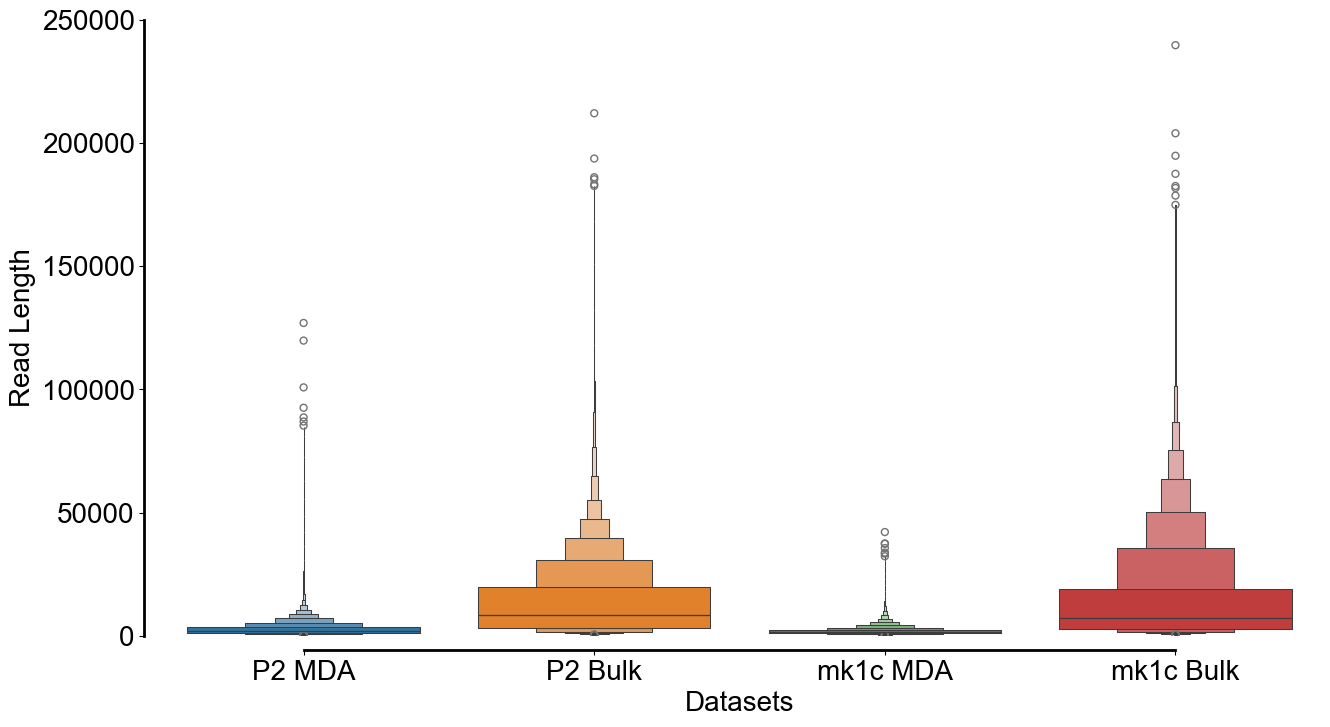

In [48]:
plot_read_length_distribution_from_npz(read_length_array, figsize=(15, 8), figure_name="read_length_distribution.pdf",
 max_y_value=250000
 )

In [ ]:
def load_number_of_chimeric_alignments_from_file(file_path):
    results = []
    with open(file_path, 'r') as file:
        for line in file:
            content = line.strip().split()
            num_chimeric_alignments = int(content[1])
            results.append(num_chimeric_alignments)
    return np.array(results)

num_chimeric_alignment_files = {
    "P2 MDA": "./data/prediction_and_chimeric/PC3_10_cells_MDA_P2_dirty.chimeric_events.txt",
    "P2 Bulk": "./data/prediction_and_chimeric/PC3_bulk_WGS_P2_clean.chimeric_events.txt",
    "mk1c MDA": "./data/prediction_and_chimeric/PC3_10_cells_MDA_Mk1c_dirty.chimeric_events.txt",
    "mk1c Bulk": "./data/prediction_and_chimeric/PC3_bulk_WGS_mk1c_clean.chimeric_events.txt",
}

def draw_number_of_chimeric_alignments_distribution(num_chimeric_alignment_files:dict[str, list[int]], figsize=(12, 8), figure_name=None):
    plt.figure(figsize=figsize)

    sns.kdeplot(num_chimeric_alignment_files, fill=True)
    plt.legend(title='Datasets')

    plt.xlabel("Datasets")
    plt.ylabel("Number of Chimeric Alignments")
    plt.title("Number of Chimeric Alignments Distribution")

    if figure_name is not None:
        plt.savefig(figure_name, dpi=300)


In [58]:
num_chimeric_alignment_files


{'P2 MDA': './data/prediction_and_chimeric/PC3_10_cells_MDA_P2_dirty.chimeric_events.txt',
 'P2 Bulk': './data/prediction_and_chimeric/PC3_bulk_WGS_P2_clean.chimeric_events.txt',
 'mk1c MDA': './data/prediction_and_chimeric/PC3_10_cells_MDA_Mk1c_dirty.chimeric_events.txt',
 'mk1c Bulk': './data/prediction_and_chimeric/PC3_bulk_WGS_mk1c_clean.chimeric_events.txt'}

In [59]:
data_number_of_chimeric_alignments = {
    key: load_number_of_chimeric_alignments_from_file(value)
    for key, value in num_chimeric_alignment_files.items()
}

In [60]:
data_number_of_chimeric_alignments

{'P2 MDA': array([4, 3, 3, ..., 2, 2, 2], shape=(12963576,)),
 'P2 Bulk': array([2, 8, 2, ..., 3, 2, 5], shape=(233740,)),
 'mk1c MDA': array([2, 2, 2, ..., 2, 2, 2], shape=(1666427,)),
 'mk1c Bulk': array([2, 7, 3, ..., 5, 3, 2], shape=(28748,))}

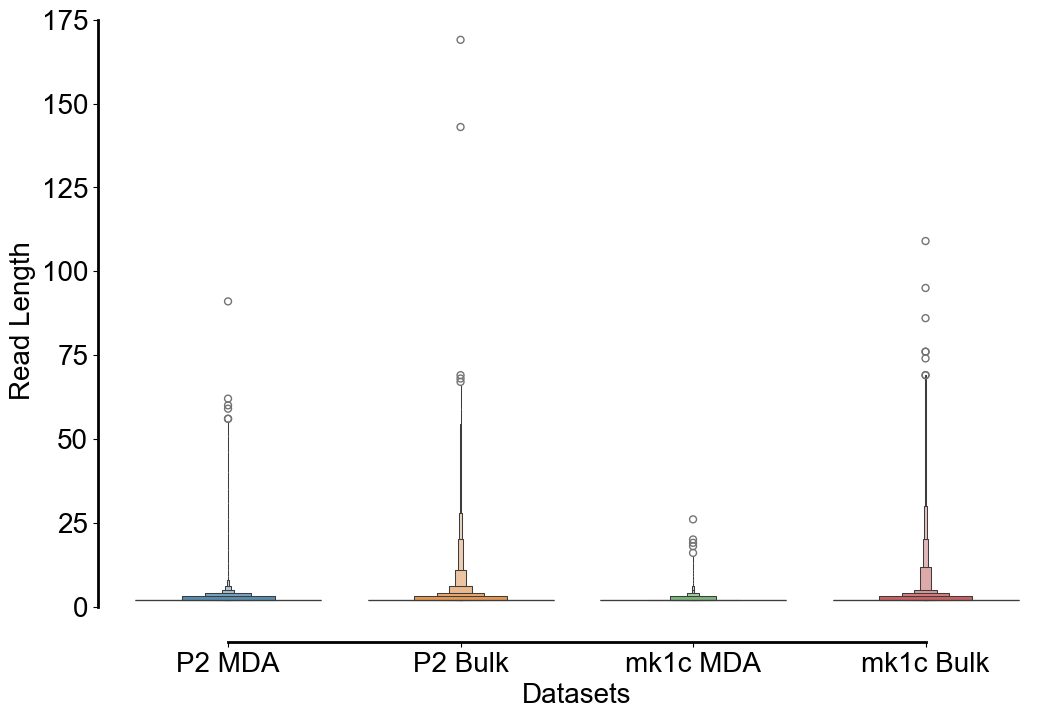

In [61]:
plot_read_length_distribution_from_npz(
    data_number_of_chimeric_alignments,
    figsize=(12, 8),
    figure_name="number_of_chimeric_alignments_distribution.pdf",
)
